# Simulation von Übertragungsfunktion
https://docs.sympy.org/latest/modules/physics/control/control.html

## Übertragungsfunktionen

In [1]:
from sympy import *
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import step_response_plot, step_response_numerical_data
import matplotlib.pyplot as plt
import numpy as np
import platform

In [4]:
#Einstellungen
#der Messung
device = 'Tek' #Tek for Tektronix 'Dig' fpr Digilent
filename = 'TEK00003.CSV' #Name of the fiel containing the measeruement Data '3V.csv'
Sprung_Endwert = 5 # Wie hoch ist der Sprung der gemessen wurde in V
time_measured = 0.25 # Wie lange wurde gemessen

# Strecke
K=0.18
T=0.0265

# Übertragungsfunktion
G1= TransferFunction(K, 1+T*s, s)
display(G1)

TransferFunction(0.18, 0.0265*s + 1, s)

## Vergleich mit den Messdaten

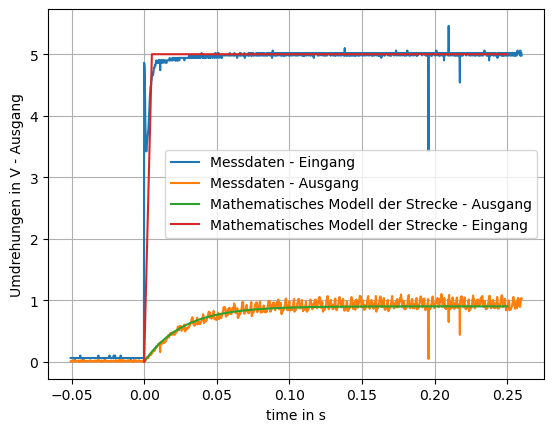

In [5]:
# daten des mathematisches Modell plotten
dataSim = step_response_numerical_data(G1,upper_limit=time_measured)

#Messdaten importieren
import pandas as pd

if device == 'Dig':
    #Von Digilent
    df = pd.read_csv(filename,header=10) # Hier müssen eventuell einstellungen gemacht werden um Messdaten aus unterscheidlichen Quellen korrekt zu lesen
elif device == 'Tek':
    #Von Tektronix
    if platform.system() == 'Linux':
        df = pd.read_csv(filename,header=14)
    else:
        df = pd.read_csv(filename,encoding='ansi',header=14)
        


df.columns = ['time', 'channel1', 'channel2'] # Spalten umbenennen für vereinfachte programmierung

#df.channel1 = df.channel1.rolling(window=100).mean() #Gleitender Mittelwert

# Daten plotten
plt.plot(df.time,df.channel1,label='Messdaten - Eingang')
plt.plot(df.time,df.channel2,label='Messdaten - Ausgang')
plt.plot(dataSim[0],[item * Sprung_Endwert for item in dataSim[1]],label='Mathematisches Modell der Strecke - Ausgang')
plt.plot(dataSim[0],Sprung_Endwert*np.sign(dataSim[0]),label='Mathematisches Modell der Strecke - Eingang')
plt.legend()
plt.xlabel('time in s')
plt.ylabel('Umdrehungen in V - Ausgang')
plt.grid()
plt.show()


## Grafische Darstellung der Strecke
### [Bodediagramm](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#bode-plot)

In [ ]:
from sympy.physics.control.control_plots import bode_plot
bode_plot(G1, initial_exp=-1, final_exp=5)  

### Impulsantwortantwort
[Impuls response](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#impulse-response-plot)  
Zeigt den Ausgang wenn am Eingang ein Dirac-Impuls angelegt wird. Vergleichbar mit dem Schlag des Klöppels auf die Glocke.

In [ ]:
from sympy.physics.control.control_plots import impulse_response_plot
impulse_response_plot(G1,upper_limit=0.5)
    

### Sprungantwort
[Step response](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#step-response-plot)

In [ ]:
from sympy.physics.control.control_plots import step_response_plot, step_response_numerical_data
step_response_plot(G1,upper_limit=0.5)   

### Pol-Nulstellendiagramm
[Pole-Zero-Plot](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#pole-zero-plot)

In [ ]:
from sympy.physics.control.control_plots import pole_zero_plot
pole_zero_plot(G1)   